## Dataset Details :

###  Data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

### Attributes:
   
   ### Bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
   
   3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
   
   4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
   
   5 - default: has credit in default? (categorical: 'no','yes','unknown')
   
   6 - housing: has housing loan? (categorical: 'no','yes','unknown')
   
   7 - loan: has personal loan? (categorical: 'no','yes','unknown')
   
   ### Related with the last contact of the current campaign:
   
   8 - contact: contact communication type (categorical: 'cellular','telephone') 
   
   9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
  
  10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
  
  11 -  duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*
   
   ### Other attributes:
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
  
  ### social and economic context attributes :
  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  **Output variable** (desired target):
  
  21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
  

  
*Citation:Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.*

In [1308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [1309]:
df=pd.read_excel(r'C:\Users\Manas\Downloads\2nd Term\Interview\Bank Marketing\bank-additional\bank-additional-full.xlsx')

In [1310]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [1311]:
df.shape

(41188, 21)

In [1312]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35447,38,technician,single,professional.course,no,yes,no,cellular,may,mon,...,7,999,1,failure,-1.8,92.893,-46.2,1.244,5099.1,no
17688,53,technician,married,professional.course,no,no,yes,cellular,jul,tue,...,11,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
16258,54,retired,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
29895,47,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
30839,42,blue-collar,married,basic.4y,no,no,no,cellular,may,tue,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no


In [1313]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Hence there are no missing values

In [1314]:
df.duplicated().sum()

12

In [1315]:
df=df.drop_duplicates()
df.shape


(41176, 21)

### Duplicate values have been removed

In [1316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [1317]:
## Categorical Variable
df_category=df[df.columns[df.dtypes==object]]

In [1318]:
## Numerical Variable
df_numeric=df[df.columns[df.dtypes!=object]]

In [1319]:
## Number of Numeric Variable
df_numeric.shape[1]

10

In [1320]:
## Number of categorical variable
df_category.shape[1]

11

In [1321]:
for i in df.columns:
    print('unique values in {} Column :'.format(i),df[i].nunique(),end='\n\n')
    

unique values in age Column : 78

unique values in job Column : 12

unique values in marital Column : 4

unique values in education Column : 8

unique values in default Column : 3

unique values in housing Column : 3

unique values in loan Column : 3

unique values in contact Column : 2

unique values in month Column : 10

unique values in day_of_week Column : 5

unique values in duration Column : 1544

unique values in campaign Column : 42

unique values in pdays Column : 27

unique values in previous Column : 8

unique values in poutcome Column : 3

unique values in emp.var.rate Column : 10

unique values in cons.price.idx Column : 26

unique values in cons.conf.idx Column : 26

unique values in euribor3m Column : 316

unique values in nr.employed Column : 11

unique values in y Column : 2



In [1322]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


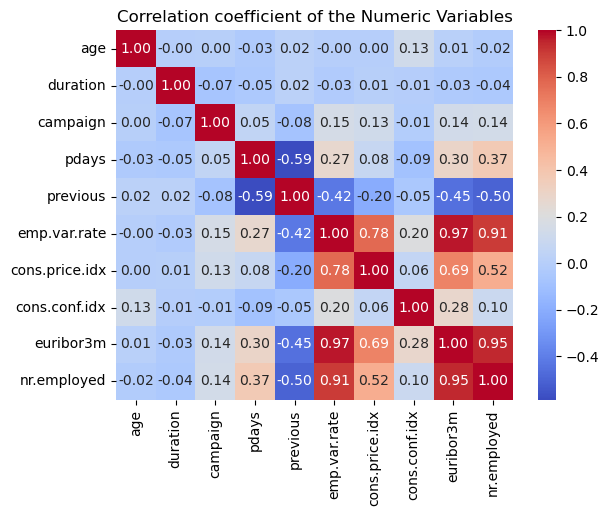

In [1323]:
sns.heatmap(df.corr(),annot=True,cbar=True,cmap='coolwarm',fmt='0.2f')
plt.title('Correlation coefficient of the Numeric Variables')
plt.show()

## Exploratory Data Analysis

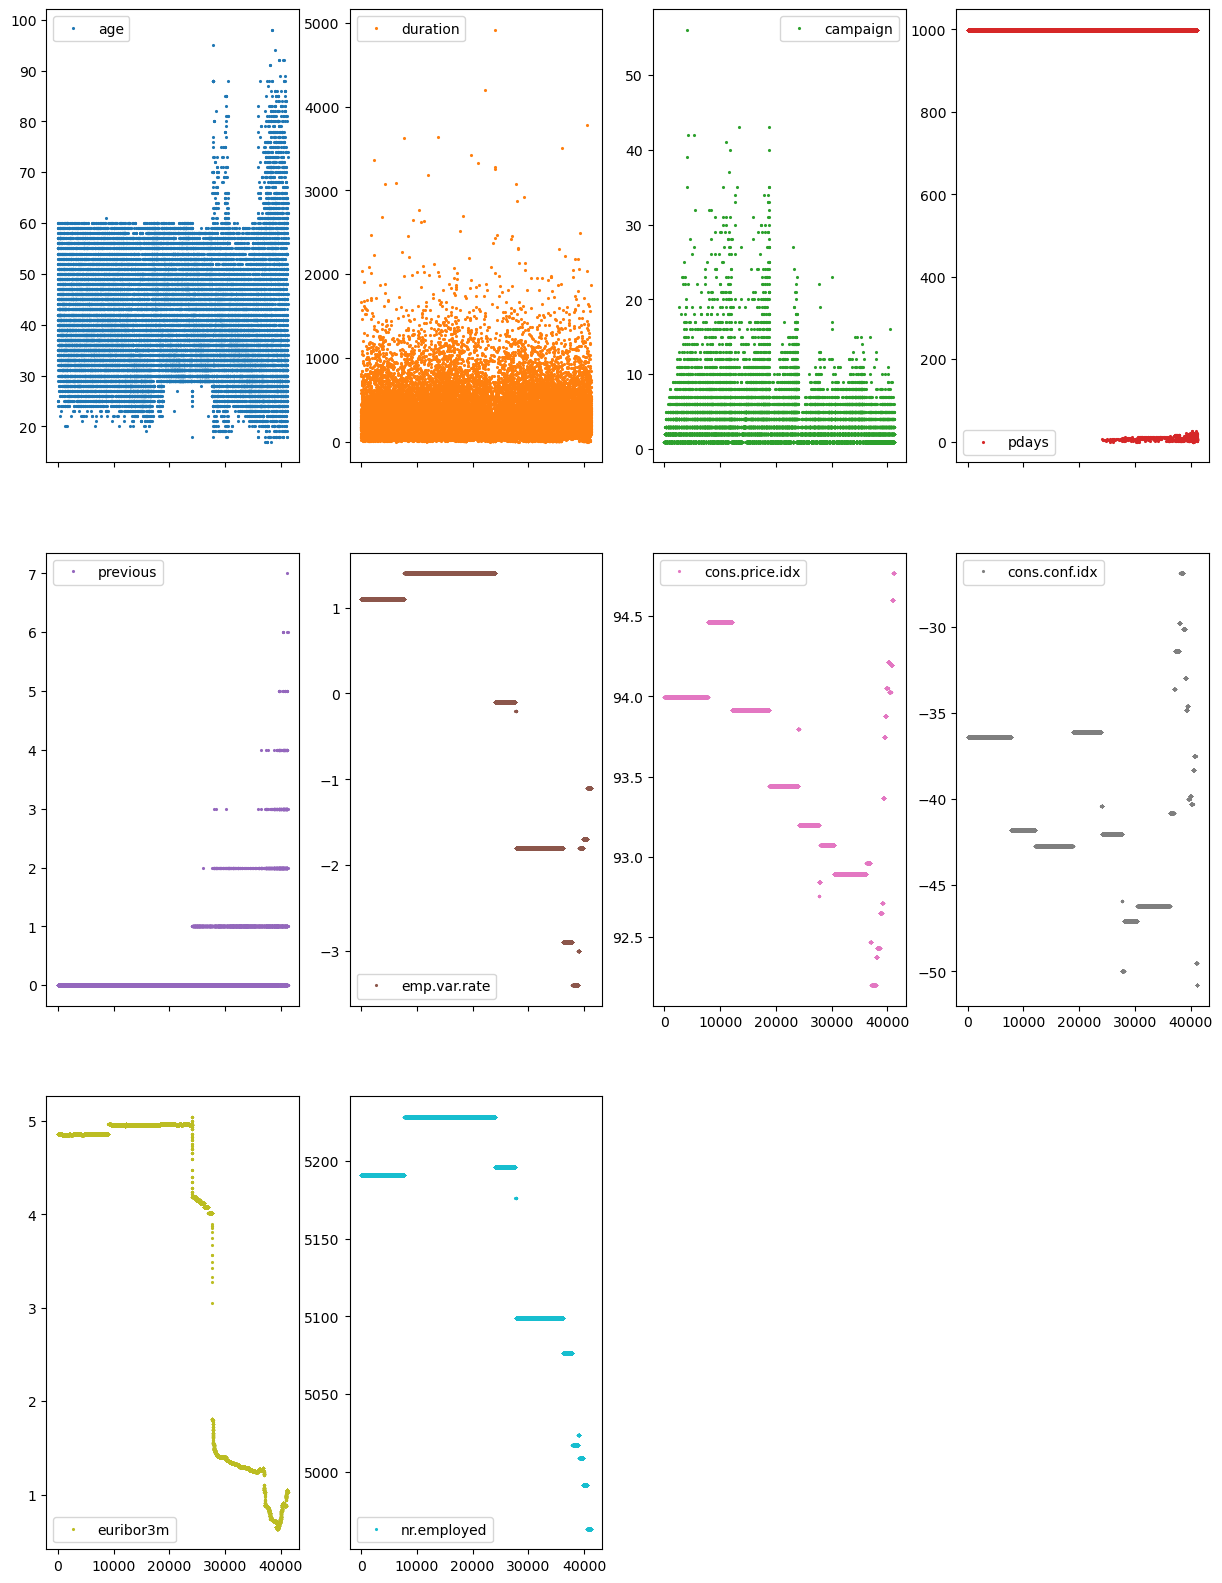

In [1324]:
##Basic understanding of numerical data

df.plot(lw=0,marker='.',subplots=True,layout=(-1,4),figsize=(15,20),markersize=2.5)
plt.show()

## Analysis of Variables



## Age



In [1325]:
df['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [1326]:
# Calculate the quartile values
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.5)
q3 = df['age'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  9.5 or any value above 69.5


C:\Users\Manas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


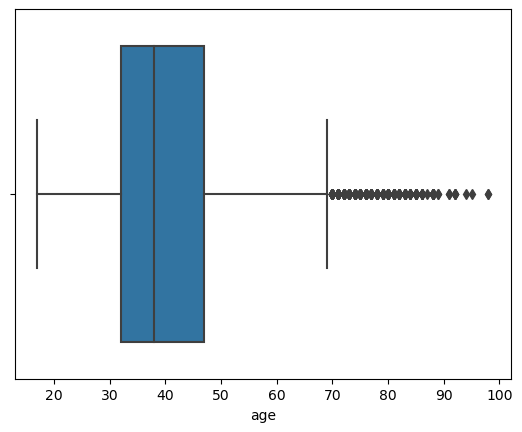

In [1327]:
sns.boxplot(df['age'])
plt.show()

### Age has been divided into various groups

In [1328]:
# Define the bin edges
bin_edges = range(10, 101, 10)

# Perform binning using cut()
df['age_group'] = pd.cut(df['age'], bins=bin_edges, right=False)

C:\Users\Manas\AppData\Local\Temp\ipykernel_10796\3073143496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=bin_edges, right=False)


In [1329]:
df['age_group'].value_counts()

[30, 40)     16933
[40, 50)     10523
[50, 60)      6861
[20, 30)      5592
[60, 70)       724
[70, 80)       318
[80, 90)       140
[10, 20)        75
[90, 100)       10
Name: age_group, dtype: int64

### We could see most people in the dataset  are from age groups 30-40 and 40-50.

In [1330]:
age_df=df.groupby('y')['age_group'].value_counts().unstack().T
age_df['% of target class']=round(age_df['yes']/(age_df['yes']+age_df['no'])*100,2)

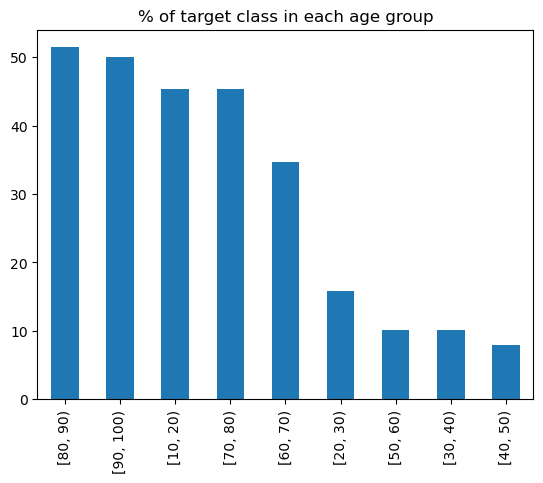

In [1331]:
age_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.title('% of target class in each age group')
plt.show()

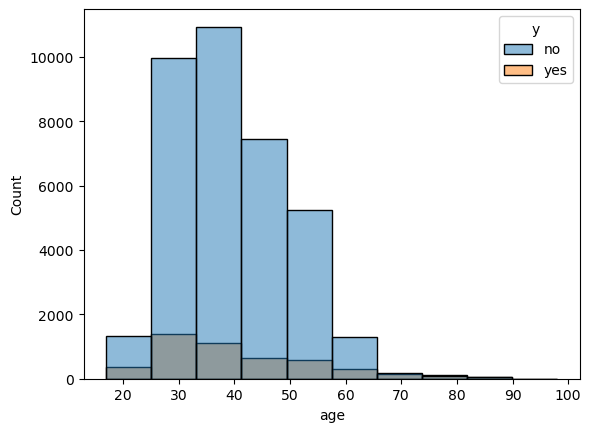

In [1332]:
sns.histplot(x=df['age'],hue=df['y'],bins=10)
plt.show()

## Job

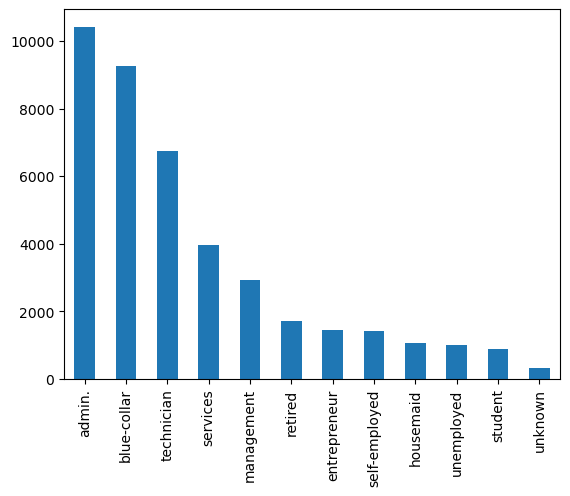

In [1333]:
df['job'].value_counts().plot(kind='bar')
plt.show()

In [1334]:
job_df=df.groupby('y')['job'].value_counts().unstack().T.sort_values(by='job',ascending=True)
job_df['% of target class']=round(job_df['yes']/(job_df['yes']+job_df['no'])*100,2)

In [1335]:
job_df

y,no,yes,% of target class
job,,,
admin.,9068,1351,12.97
blue-collar,8615,638,6.90
entrepreneur,1332,124,8.52
housemaid,954,106,10.00
management,2596,328,11.22
retired,1284,434,25.26
self-employed,1272,149,10.49
services,3644,323,8.14
student,600,275,31.43


### Most people from admin and blue-colour job.

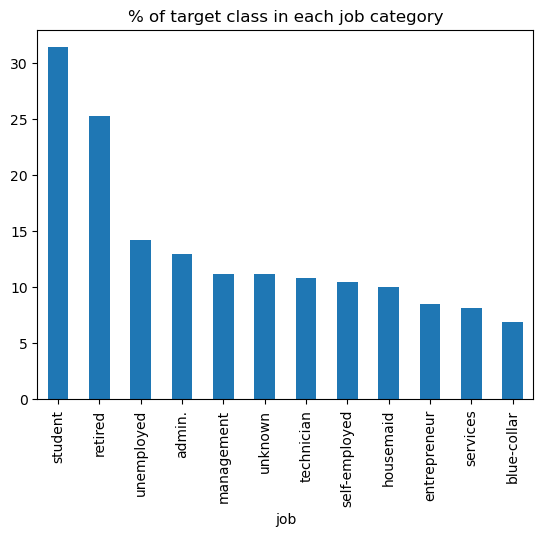

In [1336]:
job_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.title('% of target class in each job category')
plt.show()

### Percentage of target class in students is the highest and admin job profile is also high. These people could be better targets for markeing campaign

## Marital

In [1337]:
df['marital'].describe()

count       41176
unique          4
top       married
freq        24921
Name: marital, dtype: object

In [1338]:
category_counts = df['marital'].value_counts()

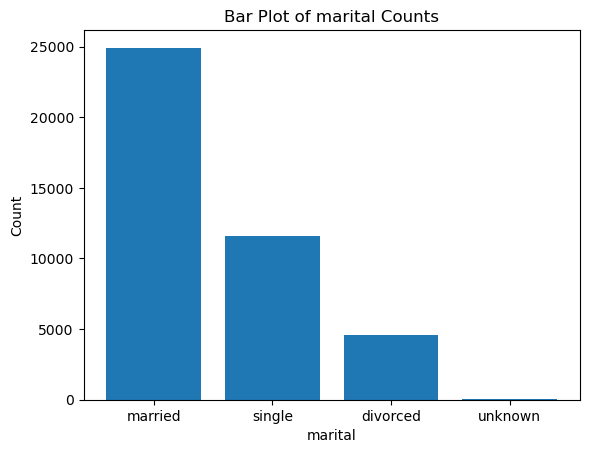

In [1339]:
# Create the bar plot
plt.bar(category_counts.index, category_counts.values)
# Set labels and title
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('Bar Plot of marital Counts')
plt.show()


### Most people are married.

In [1340]:
df['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [1341]:
marital_df=df.groupby('y')['marital'].value_counts().unstack().T
marital_df

y,no,yes
marital,,
divorced,4135,476
married,22390,2531
single,9944,1620
unknown,68,12


In [1342]:
marital_df['% of target class']=round(marital_df['yes']/(marital_df['yes']+marital_df['no'])*100,2)
marital_df

y,no,yes,% of target class
marital,,,
divorced,4135,476,10.32
married,22390,2531,10.16
single,9944,1620,14.01
unknown,68,12,15.00


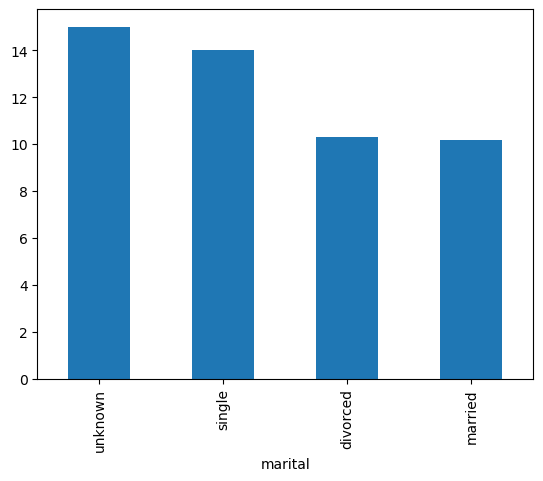

In [1343]:
marital_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.show()

## Education

In [1344]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

### Most people are having university degrees.

In [1345]:
education_df=df.groupby('y')['education'].value_counts().unstack().T
education_df['% of target class']=round(education_df['yes']/(education_df['yes']+education_df['no'])*100,2)

In [1346]:
education_df

y,no,yes,% of target class
education,,,
basic.4y,3748,428,10.25
basic.6y,2103,188,8.21
basic.9y,5572,473,7.82
high.school,8481,1031,10.84
illiterate,14,4,22.22
professional.course,4645,595,11.35
university.degree,10495,1669,13.72
unknown,1479,251,14.51


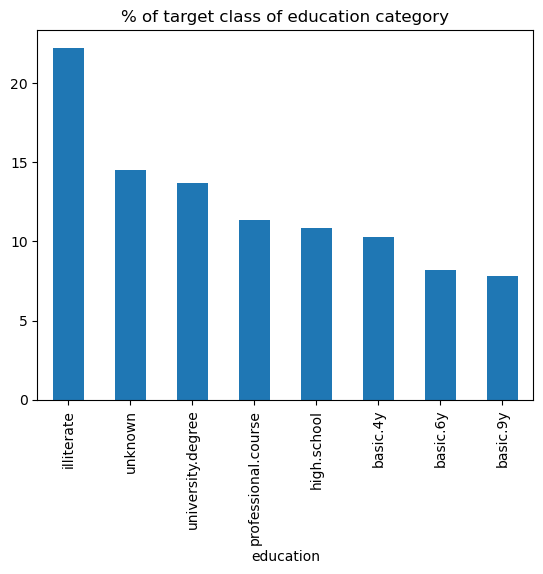

In [1347]:
education_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.title('% of target class of education category')
plt.show()

### People with university degrees are a good target.

## Default

In [1348]:
df['default'].describe()

count     41176
unique        3
top          no
freq      32577
Name: default, dtype: object

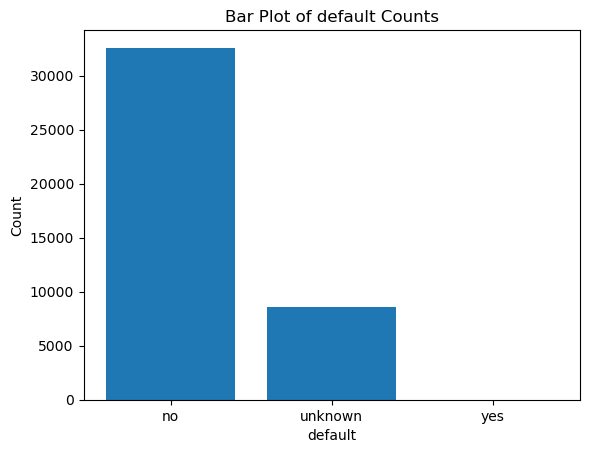

In [1349]:
category_counts = df['default'].value_counts()

# Create the bar plot
plt.bar(category_counts.index, category_counts.values)

# Set labels and title
plt.xlabel('default')
plt.ylabel('Count')
plt.title('Bar Plot of default Counts')

# Display the plot
plt.show()

### Most people in the previous marketing campaign had no default.

In [1350]:
df['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [1351]:
default_df=df.groupby('y')['default'].value_counts().unstack().T.fillna(0)
default_df

y,no,yes
default,,
no,28381.0,4196.0
unknown,8153.0,443.0
yes,3.0,0.0


In [1352]:
default_df['% of target class']=round(default_df['yes']/(default_df['yes']+default_df['no'])*100,2)
default_df

y,no,yes,% of target class
default,,,
no,28381.0,4196.0,12.88
unknown,8153.0,443.0,5.15
yes,3.0,0.0,0.00


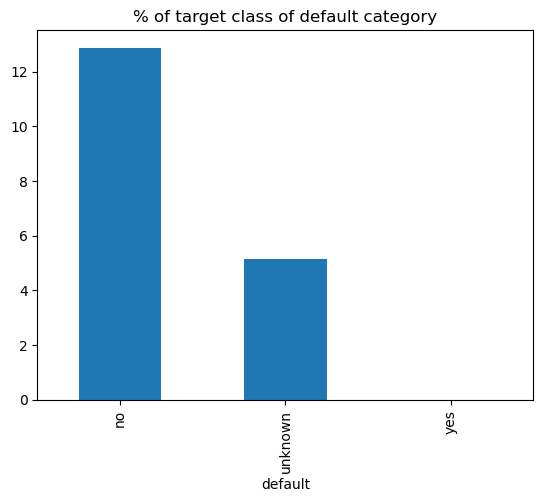

In [1353]:
default_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.title('% of target class of default category')
plt.show()

## Housing

In [1354]:
df['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [1355]:
housing_df=df.groupby('y')['housing'].value_counts().unstack().T
housing_df['% of target class']=round(housing_df['yes']/(housing_df['yes']+housing_df['no'])*100,2)

In [1356]:
housing_df

y,no,yes,% of target class
housing,,,
no,16590,2025,10.88
unknown,883,107,10.81
yes,19064,2507,11.62


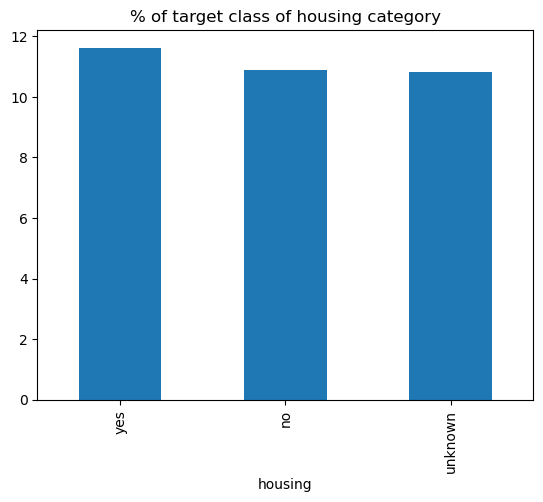

In [1357]:
housing_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.title('% of target class of housing category')
plt.show()

### People with house and no house, dont seem to create much difference in term conversion.

## Loan

In [1358]:
df['loan'].describe()

count     41176
unique        3
top          no
freq      33938
Name: loan, dtype: object

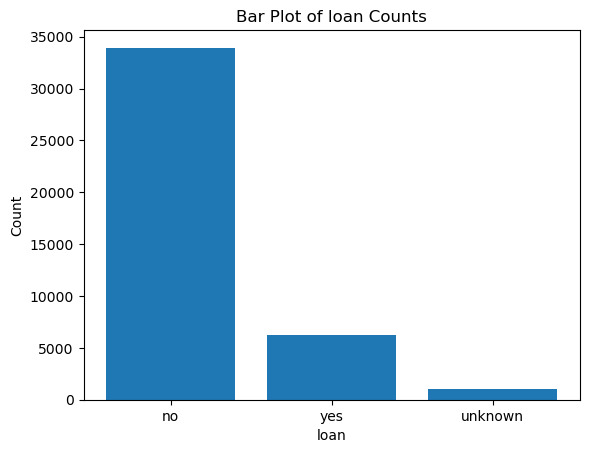

In [1359]:
category_counts = df['loan'].value_counts()

# Create the bar plot
plt.bar(category_counts.index, category_counts.values)

# Set labels and title
plt.xlabel('loan')
plt.ylabel('Count')
plt.title('Bar Plot of loan Counts')

# Display the plot
plt.show()

### Most people from previous campaign had no loan.

In [1360]:
df['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [1361]:
loan_df=df.groupby('y')['loan'].value_counts().unstack().T
loan_df

y,no,yes
loan,,
no,30089,3849
unknown,883,107
yes,5565,683


In [1362]:
loan_df['% of target class']=round(loan_df['yes']/(loan_df['yes']+loan_df['no'])*100,2)
loan_df

y,no,yes,% of target class
loan,,,
no,30089,3849,11.34
unknown,883,107,10.81
yes,5565,683,10.93


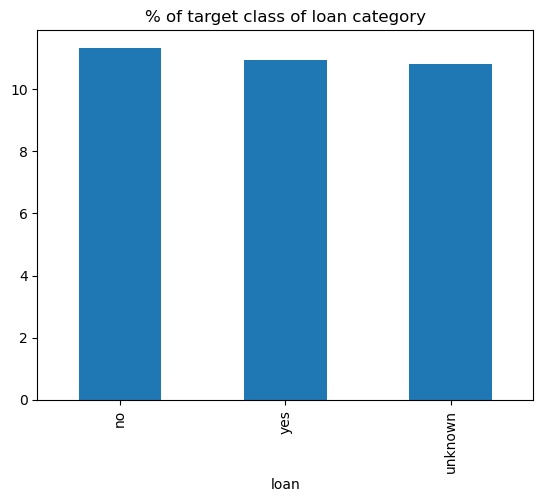

In [1363]:
loan_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.title('% of target class of loan category')
plt.show()

## Related with Last Contact of the current campaign:

## Contact

In [1364]:
df['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [1365]:
contact_df=df.groupby('y')['contact'].value_counts().unstack().T
contact_df['% of target class']=round(contact_df['yes']/(contact_df['yes']+contact_df['no'])*100,2)

In [1366]:
contact_df

y,no,yes,% of target class
contact,,,
cellular,22283,3852,14.74
telephone,14254,787,5.23


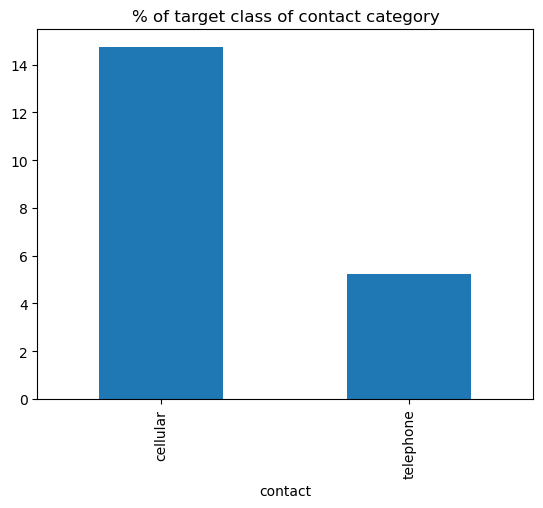

In [1367]:
contact_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.title('% of target class of contact category')
plt.show()

### It is definitely better to target cellular customers.

## Month

In [1368]:
df['month'].describe()

count     41176
unique       10
top         may
freq      13767
Name: month, dtype: object

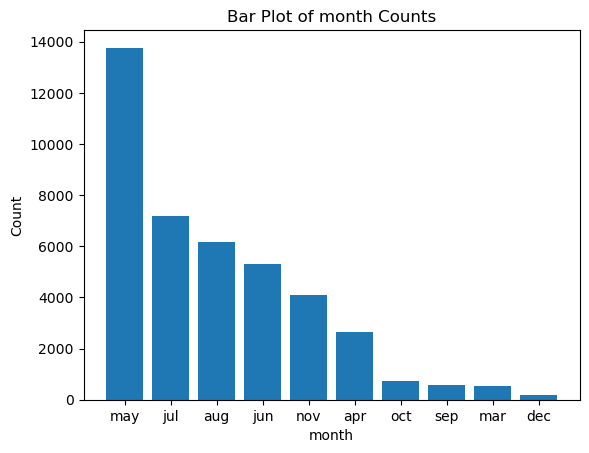

In [1369]:
category_counts = df['month'].value_counts()

# Create the bar plot
plt.bar(category_counts.index, category_counts.values)

# Set labels and title
plt.xlabel('month')
plt.ylabel('Count')
plt.title('Bar Plot of month Counts')

# Display the plot
plt.show()

In [1370]:
df['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

### Most previous contacts had been in the month of May.

In [1371]:
month_df=df.groupby('y')['month'].value_counts().unstack().T
month_df

y,no,yes
month,,
apr,2092,539
aug,5521,655
dec,93,89
jul,6521,648
jun,4759,559
mar,270,276
may,12881,886
nov,3684,416
oct,402,315


In [1372]:
month_df['% of target class']=round(month_df['yes']/(month_df['yes']+month_df['no'])*100,2)
month_df

y,no,yes,% of target class
month,,,
apr,2092,539,20.49
aug,5521,655,10.61
dec,93,89,48.90
jul,6521,648,9.04
jun,4759,559,10.51
mar,270,276,50.55
may,12881,886,6.44
nov,3684,416,10.15
oct,402,315,43.93


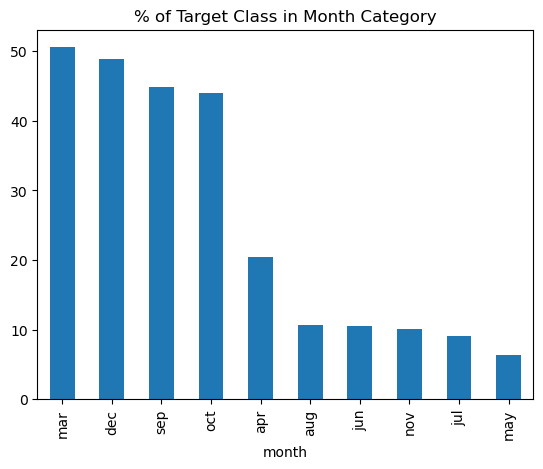

In [1373]:
month_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.title('% of Target Class in Month Category')
plt.show()

## day_of_week


In [1374]:
df['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [1375]:
day_of_week_df=df.groupby('y')['day_of_week'].value_counts().unstack().T
day_of_week_df['% of target class']=round(day_of_week_df['yes']/(day_of_week_df['yes']+day_of_week_df['no'])*100,2)

In [1376]:
day_of_week_df

y,no,yes,% of target class
day_of_week,,,
fri,6980,846,10.81
mon,7665,847,9.95
thu,7574,1044,12.11
tue,7133,953,11.79
wed,7185,949,11.67


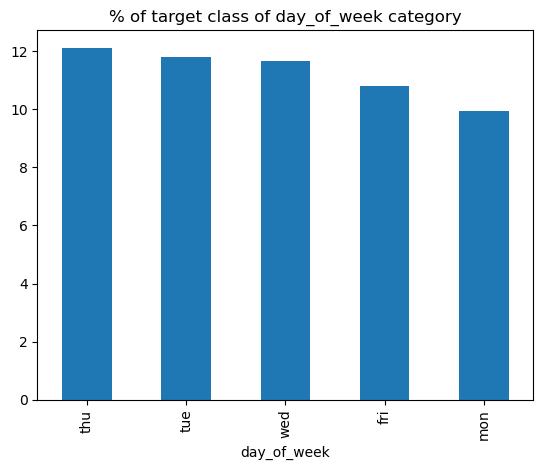

In [1377]:
day_of_week_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.title('% of target class of day_of_week category')
plt.show()

### There seems no particular impact of day of week variable wrt to Target class.

In [1378]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_group'],
      dtype='object')

## Duration

In [1379]:
df['duration'].describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [1380]:
df1=df.copy()

In [1381]:
df1['duration_minutes'] = df1['duration'] / 60

In [1382]:
df1['duration_minutes'].describe()

count    41176.000000
mean         4.305264
std          4.321755
min          0.000000
25%          1.700000
50%          3.000000
75%          5.316667
max         81.966667
Name: duration_minutes, dtype: float64

In [1383]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_minutes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"[50, 60)",4.350000
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"[50, 60)",2.483333
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"[30, 40)",3.766667
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"[40, 50)",2.516667
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"[50, 60)",5.116667


In [1384]:
# Calculate the quartile values
q1 = df1['duration_minutes'].quantile(0.25)
q2 = df1['duration_minutes'].quantile(0.5)
q3 = df1['duration_minutes'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  -3.7249999999999988 or any value above 10.741666666666665


C:\Users\Manas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


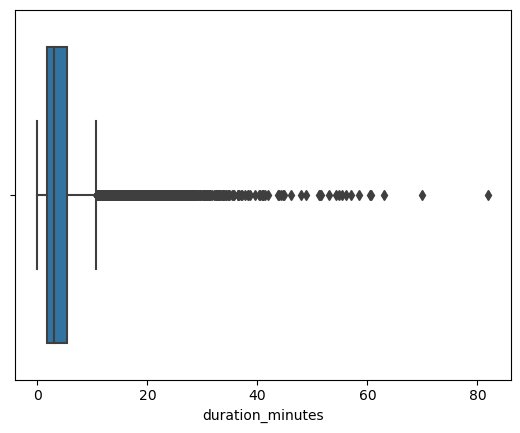

In [1385]:
sns.boxplot(df1['duration_minutes'])
plt.show()

In [1386]:
# Define the bin edges
bin_edges = range(0, 100, 10)

In [1387]:
# Perform binning using cut()
df1['duration_group'] = pd.cut(df1['duration_minutes'], bins=bin_edges, right=False)

In [1388]:
df1['duration_group'].value_counts()

[0, 10)     37698
[10, 20)     2963
[20, 30)      414
[30, 40)       70
[40, 50)       16
[50, 60)       10
[60, 70)        4
[80, 90)        1
[70, 80)        0
Name: duration_group, dtype: int64

### We could see maximum duration has been in the 0-10 mins group

In [1389]:
duration_df=df1.groupby('y')['duration_group'].value_counts().unstack().T

In [1390]:
duration_df['% of target class']=round(duration_df['yes']/(duration_df['yes']+duration_df['no'])*100,2).fillna(0)
duration_df

y,no,yes,% of target class
"[0, 10)",34749,2949,7.82
"[10, 20)",1594,1369,46.20
"[20, 30)",153,261,63.04
"[30, 40)",28,42,60.00
"[40, 50)",4,12,75.00
"[50, 60)",7,3,30.00
"[60, 70)",1,3,75.00
"[70, 80)",0,0,0.00
"[80, 90)",1,0,0.00


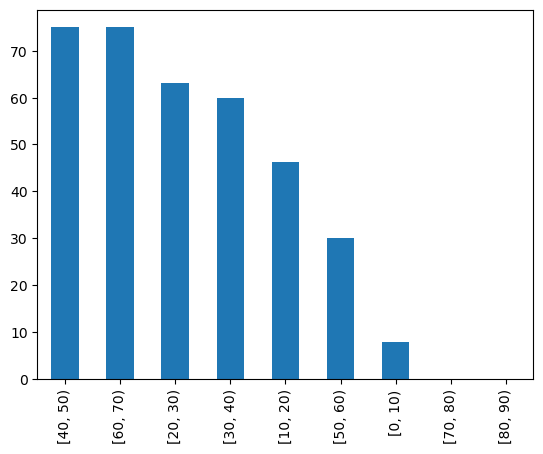

In [1391]:
duration_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.show()

### Percentage of term deposit conversion increases with increase in duration. 

## Other Attributes:

## Campaign

In [1392]:
df['campaign'].value_counts()

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [1393]:
campaign_df=df.groupby('y')['campaign'].value_counts().unstack().T.fillna(0) 
## zero values indicate there are no values in the category
campaign_df['% of target class']=round(campaign_df['yes']/(campaign_df['yes']+campaign_df['no'])*100,2)

In [1394]:
campaign_df

y,no,yes,% of target class
campaign,,,
1,15335.0,2299.0,13.04
2,9357.0,1211.0,11.46
3,4766.0,574.0,10.75
4,2401.0,249.0,9.40
5,1479.0,120.0,7.50
6,904.0,75.0,7.66
7,591.0,38.0,6.04
8,383.0,17.0,4.25
9,266.0,17.0,6.01


In [1395]:
df['campaign_bin'] = np.where(df['campaign'] <= 5, 'Below 5', 'Above 5')

C:\Users\Manas\AppData\Local\Temp\ipykernel_10796\16603130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['campaign_bin'] = np.where(df['campaign'] <= 5, 'Below 5', 'Above 5')


In [1396]:
campaign_bin_df=df.groupby('y')['campaign_bin'].value_counts().unstack().T
## zero values indicate there are no values in the category
campaign_bin_df['% of target class']=round(campaign_bin_df['yes']/(campaign_bin_df['yes']+campaign_bin_df['no'])*100,2)

In [1397]:
campaign_bin_df

y,no,yes,% of target class
campaign_bin,,,
Above 5,3199,186,5.49
Below 5,33338,4453,11.78


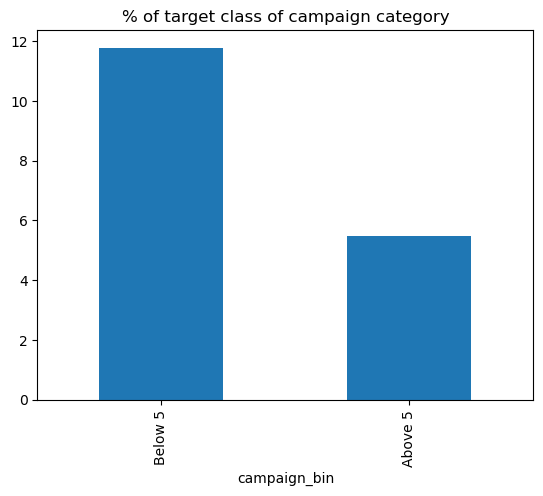

In [1398]:
campaign_bin_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.title('% of target class of campaign category')
plt.show()

### We could see Campaign below 5 show much better conversion of term deposit.

## Pdays

In [1399]:
df['pdays'].describe()

count    41176.000000
mean       962.464810
std        186.937102
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [1400]:
df1['pdays_bin'] = np.where(df1['pdays'] == 999, 'First Time Contacted', 'previously Contacted')

In [1401]:
pdays_df=df1.groupby('y')['pdays_bin'].value_counts().unstack().T
pdays_df

y,no,yes
pdays_bin,,
First Time Contacted,35989,3672
previously Contacted,548,967


In [1402]:
pdays_df['% of target class']=round(pdays_df['yes']/(pdays_df['yes']+pdays_df['no'])*100,2)
pdays_df

y,no,yes,% of target class
pdays_bin,,,
First Time Contacted,35989,3672,9.26
previously Contacted,548,967,63.83


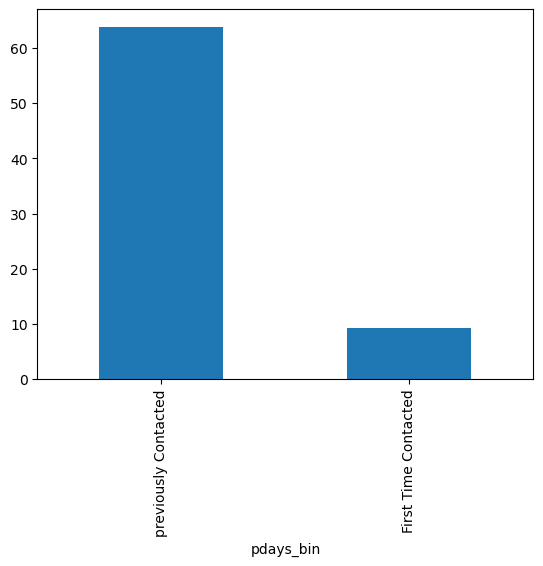

In [1403]:
pdays_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.show()

### The people who had been previously contacted give us better term deposit conversion

## Previous

In [1404]:
df['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [1405]:
previous_df=df.groupby('y')['previous'].value_counts().unstack().T.fillna(0)
previous_df['% of target class']=round(previous_df['yes']/(previous_df['yes']+previous_df['no'])*100,2)

In [1406]:
previous_df

y,no,yes,% of target class
previous,,,
0,32411.0,3140.0,8.83
1,3594.0,967.0,21.20
2,404.0,350.0,46.42
3,88.0,128.0,59.26
4,32.0,38.0,54.29
5,5.0,13.0,72.22
6,2.0,3.0,60.00
7,1.0,0.0,0.00


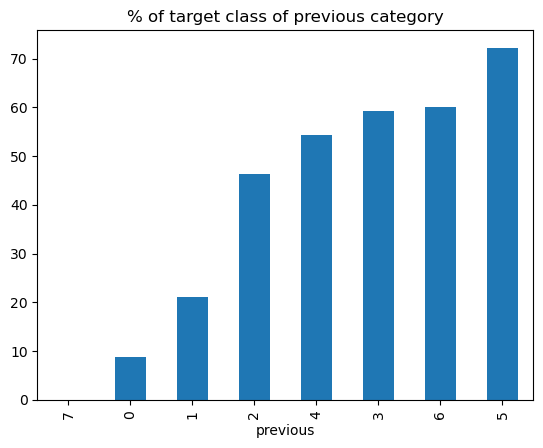

In [1407]:
previous_df['% of target class'].sort_values(ascending=True).plot(kind='bar')
plt.title('% of target class of previous category')
plt.show()

 Clearly, we can see that with more contacts the percentage of target class increases.

In [1408]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_group',
       'campaign_bin'],
      dtype='object')

## Poutcome

In [1409]:
df['poutcome'].describe()

count           41176
unique              3
top       nonexistent
freq            35551
Name: poutcome, dtype: object

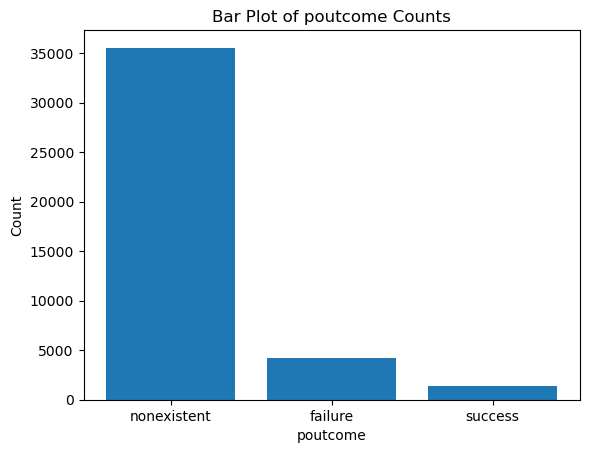

In [1410]:
category_counts = df['poutcome'].value_counts()

# Create the bar plot
plt.bar(category_counts.index, category_counts.values)

# Set labels and title
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.title('Bar Plot of poutcome Counts')

# Display the plot
plt.show()

In [1411]:
df['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [1412]:
poutcome_df=df.groupby('y')['poutcome'].value_counts().unstack().T
poutcome_df

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32411,3140
success,479,894


In [1413]:
poutcome_df['% of target class']=round(poutcome_df['yes']/(poutcome_df['yes']+poutcome_df['no'])*100,2)
poutcome_df

y,no,yes,% of target class
poutcome,,,
failure,3647,605,14.23
nonexistent,32411,3140,8.83
success,479,894,65.11


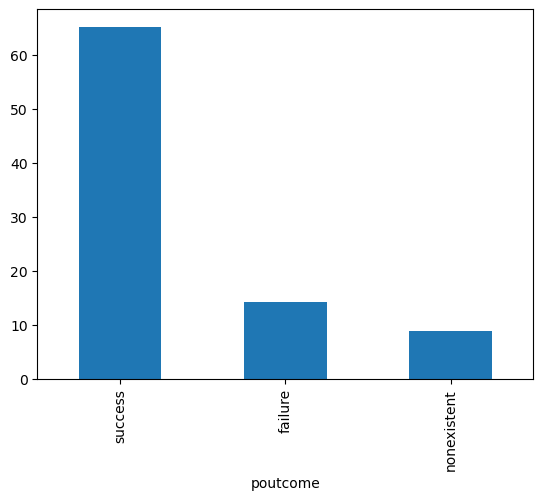

In [1414]:
poutcome_df['% of target class'].sort_values(ascending=False).plot(kind='bar')
plt.show()

### If the outcome of previous campaign was a success, they were willing to take term deposit more. Although, more people were there who were a failure in previous campaign

## Social and Economic Context Attributes :

## employment variation rate variable

In [1415]:
df['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [1416]:
emp_var_rate_df=df.groupby('y')['emp.var.rate'].value_counts().unstack().T
emp_var_rate_df['% of target class']=round(emp_var_rate_df['yes']/(emp_var_rate_df['yes']+emp_var_rate_df['no'])*100,2)

In [1417]:
emp_var_rate_df

y,no,yes,% of target class
emp.var.rate,,,
-3.4,616,454,42.43
-3.0,84,88,51.16
-2.9,1069,593,35.68
-1.8,7721,1461,15.91
-1.7,370,403,52.13
-1.1,334,301,47.40
-0.2,9,1,10.00
-0.1,3450,232,6.30
1.1,7522,240,3.09


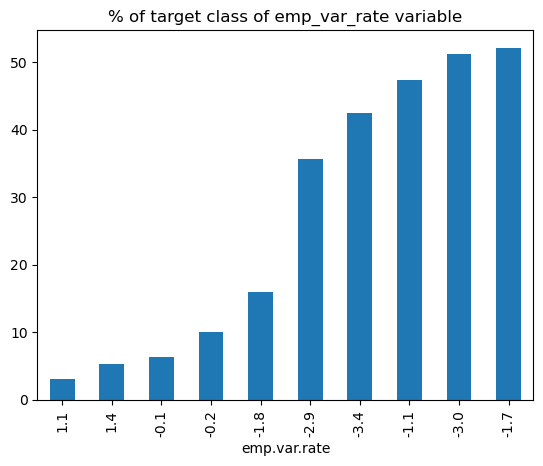

In [1418]:
emp_var_rate_df['% of target class'].sort_values(ascending=True).plot(kind='bar')
plt.title('% of target class of emp_var_rate variable')
plt.show()

 We can see that a negative employee variation rate, increases the percentage of people taking term deposit. This could be because a sluggishness in the market, calls for safer investments like term deposit.

## Consumer Price Index

### The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time.

In [1419]:
df['cons.price.idx'].describe()

count    41176.000000
mean        93.575720
std          0.578839
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

In [1420]:
df['cons.price.idx'].value_counts()

93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [1421]:
CPI_df=df.groupby('y')['cons.price.idx'].value_counts().unstack().T
CPI_df

y,no,yes
cons.price.idx,,
92.201,506,264
92.379,161,106
92.431,266,180
92.469,112,65
92.649,189,168
92.713,84,88
92.756,9,1
92.843,156,126
92.893,5269,524


In [1422]:
filtered_CPI_df = CPI_df[CPI_df.sum(axis=1) > 1000]
filtered_CPI_df

y,no,yes
cons.price.idx,,
92.893,5269,524
93.075,2015,442
93.200,3425,190
93.444,4902,271
93.918,6274,407
93.994,7522,240
94.465,4186,188


In [1423]:
filtered_CPI_df['% of target class']=round(CPI_df['yes']/(CPI_df['yes']+CPI_df['no'])*100,2)
filtered_CPI_df

C:\Users\Manas\AppData\Local\Temp\ipykernel_10796\4266156340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_CPI_df['% of target class']=round(CPI_df['yes']/(CPI_df['yes']+CPI_df['no'])*100,2)


y,no,yes,% of target class
cons.price.idx,,,
92.893,5269,524,9.05
93.075,2015,442,17.99
93.200,3425,190,5.26
93.444,4902,271,5.24
93.918,6274,407,6.09
93.994,7522,240,3.09
94.465,4186,188,4.30


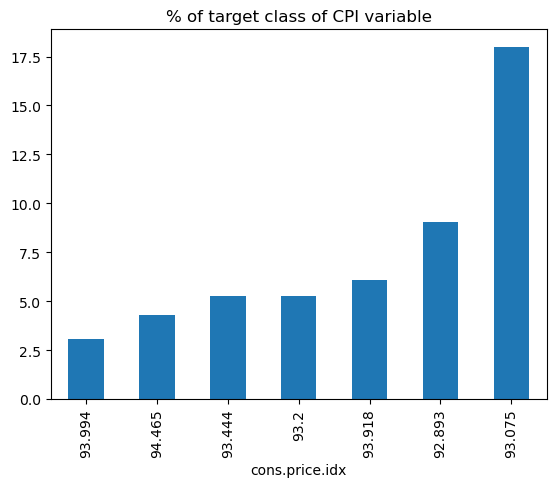

In [1424]:
filtered_CPI_df['% of target class'].sort_values(ascending=True).plot(kind='bar')
plt.title('% of target class of CPI variable')
plt.show()

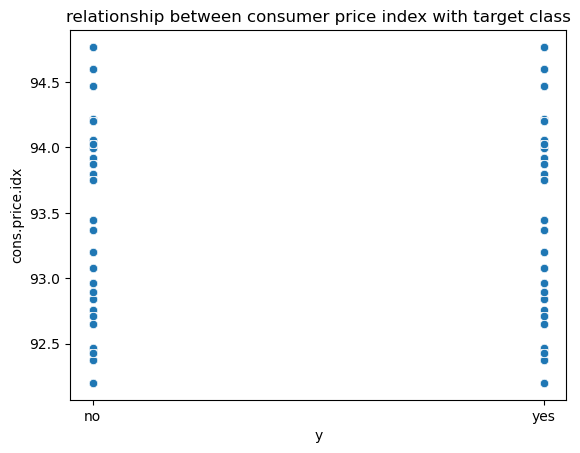

In [1425]:
sns.scatterplot(y=df['cons.price.idx'],x=df['y'])
plt.title('relationship between consumer price index with target class')
plt.show()

### There seems to be no discernible relationship between CPI and Target Class 

## Consumer Confidence Index

### The Consumer Confidence Index (CCI) is a survey, administered by The Conference Board, that measures how optimistic or pessimistic consumers are regarding their expected financial situation.

In [1426]:
df['cons.conf.idx'].describe()

count    41176.000000
mean       -40.502863
std          4.627860
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [1427]:
df['cons.conf.idx'].value_counts()

-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [1428]:
CcI_df=df.groupby('y')['cons.conf.idx'].value_counts().unstack().T
CcI_df


y,no,yes
cons.conf.idx,,
-50.8,70,58
-50.0,156,126
-49.5,111,93
-47.1,2015,442
-46.2,5269,524
-45.9,9,1
-42.7,6274,407
-42.0,3425,190
-41.8,4186,188


In [1429]:
filtered_CcI_df = CcI_df[CcI_df.sum(axis=1) > 1000] ### Taking indices with atleast 1000 people.
filtered_CcI_df

y,no,yes
cons.conf.idx,,
-47.1,2015,442
-46.2,5269,524
-42.7,6274,407
-42.0,3425,190
-41.8,4186,188
-36.4,7522,240
-36.1,4902,271


In [1430]:
filtered_CcI_df['% of target class']=round(CcI_df['yes']/(CcI_df['yes']+CcI_df['no'])*100,2)
filtered_CcI_df

C:\Users\Manas\AppData\Local\Temp\ipykernel_10796\176752636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_CcI_df['% of target class']=round(CcI_df['yes']/(CcI_df['yes']+CcI_df['no'])*100,2)


y,no,yes,% of target class
cons.conf.idx,,,
-47.1,2015,442,17.99
-46.2,5269,524,9.05
-42.7,6274,407,6.09
-42.0,3425,190,5.26
-41.8,4186,188,4.30
-36.4,7522,240,3.09
-36.1,4902,271,5.24


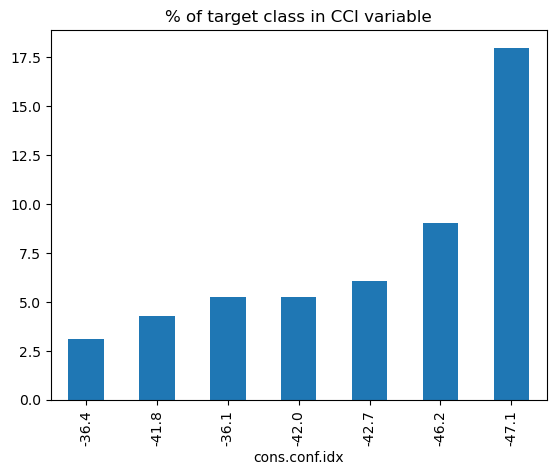

In [1431]:
filtered_CcI_df['% of target class'].sort_values(ascending=True).plot(kind='bar')
plt.title('% of target class in CCI variable')
plt.show()

### Generally the more negative it is higher the Term deposit conversion

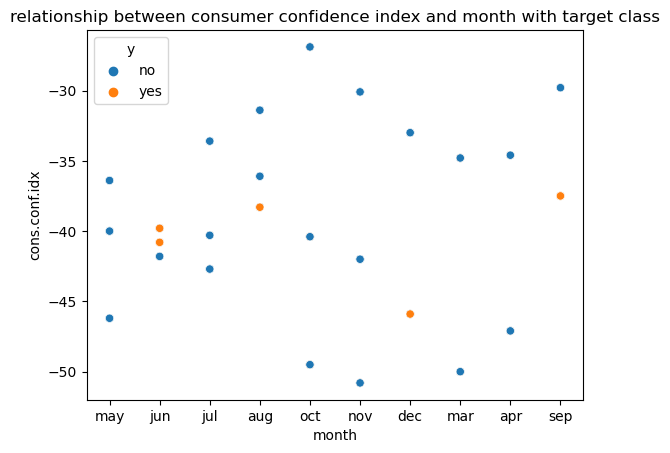

In [1432]:
sns.scatterplot(y=df['cons.conf.idx'],x=df['month'],hue=df['y'])
plt.title('relationship between consumer confidence index and month with target class')
plt.show()

## Euribor Variable

### Euribor is short for Euro Interbank Offered Rate. The Euribor rates are based on the average interest rates at which a large panel of European banks borrow funds from one another.



In [1433]:
df['euribor3m'].describe()

count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [1434]:
# Define the bin edges
bin_edges = range(0, 8, 2)

# Perform binning using cut()
df['euribor_range'] = pd.cut(df['euribor3m'], bins=bin_edges, right=False)

C:\Users\Manas\AppData\Local\Temp\ipykernel_10796\3330868039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['euribor_range'] = pd.cut(df['euribor3m'], bins=bin_edges, right=False)


In [1435]:
df['euribor_range']

0        [4, 6)
1        [4, 6)
2        [4, 6)
3        [4, 6)
4        [4, 6)
          ...  
41183    [0, 2)
41184    [0, 2)
41185    [0, 2)
41186    [0, 2)
41187    [0, 2)
Name: euribor_range, Length: 41176, dtype: category
Categories (3, interval[int64, left]): [[0, 2) < [2, 4) < [4, 6)]

In [1436]:
df['euribor_range'].value_counts()

[4, 6)    27668
[0, 2)    13494
[2, 4)       14
Name: euribor_range, dtype: int64

In [1437]:
euribor3m_df=df.groupby('y')['euribor3m'].value_counts().unstack().T
euribor3m_df['% of target class']=round(euribor3m_df['yes']/(euribor3m_df['yes']+euribor3m_df['no'])*100,2)

In [1438]:
euribor3m_df

y,no,yes,% of target class
euribor3m,,,
0.634,2.0,6.0,75.00
0.635,21.0,22.0,51.16
0.636,11.0,3.0,21.43
0.637,1.0,5.0,83.33
0.638,2.0,5.0,71.43
...,...,...,...
4.967,610.0,33.0,5.13
4.968,934.0,57.0,5.75
4.970,168.0,4.0,2.33


In [1439]:
euribor_range_df=df.groupby('y')['euribor_range'].value_counts().unstack().T
euribor_range_df['% of target class']=round(euribor_range_df['yes']/(euribor_range_df['yes']+euribor_range_df['no'])*100,2)

In [1440]:
euribor_range_df[['no', 'yes', '% of target class']].sort_values(by='% of target class',ascending=False)

y,no,yes,% of target class
"[0, 2)",10194,3300,24.46
"[2, 4)",13,1,7.14
"[4, 6)",26330,1338,4.84


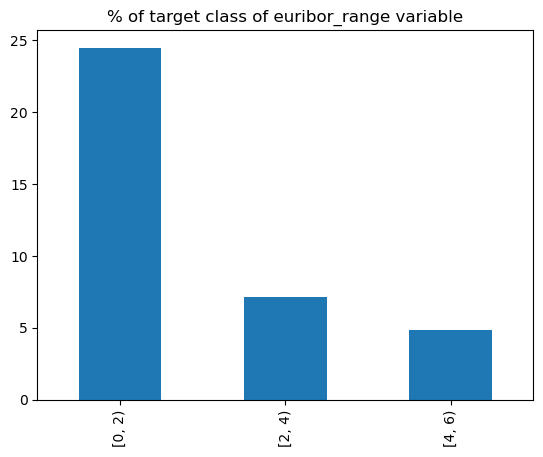

In [1441]:
euribor_range_df['% of target class'].plot(kind='bar')
plt.title('% of target class of euribor_range variable')
plt.show()

### Clearly,we see there is more percentage of people who take term deposits, when the euribor rate ranges between 0-2.

## No of employed

In [1442]:
df['nr.employed'].describe()

count    41176.000000
mean      5167.034870
std         72.251364
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [1443]:
df['nr.employed'].value_counts()

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [1444]:
emp_df=df.groupby('y')['nr.employed'].value_counts().unstack().T
emp_df['% of target class']=round(emp_df['yes']/(emp_df['yes']+emp_df['no'])*100,2)

In [1445]:
emp_df

y,no,yes,% of target class
nr.employed,,,
4963.6,334,301,47.40
4991.6,370,403,52.13
5008.7,281,369,56.77
5017.5,616,454,42.43
5023.5,84,88,51.16
5076.2,1069,593,35.68
5099.1,7440,1092,12.80
5176.3,9,1,10.00
5191.0,7522,240,3.09


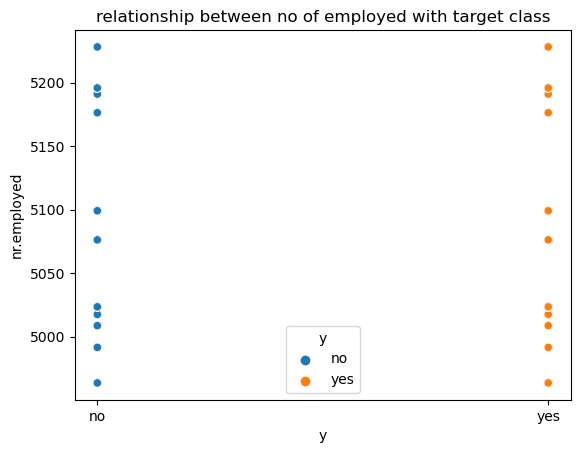

In [1446]:
sns.scatterplot(y=df['nr.employed'], x=df['y'],hue=df['y'])
plt.title('relationship between no of employed with target class')
plt.show()

### There seems to be no particular relationship between no of employees and target Class.

## Target Variable y - has the client subscribed a term deposit? 

percentage of yes and no in target variable

In [1447]:
round(df['y'].value_counts()/len(df)*100,2)

no     88.73
yes    11.27
Name: y, dtype: float64

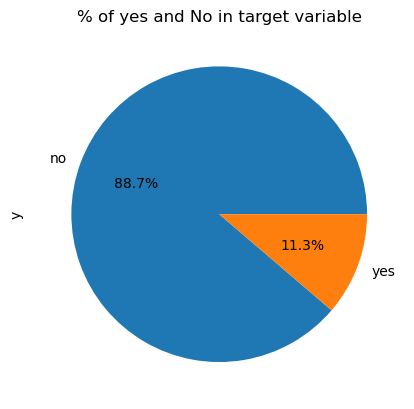

In [1448]:
round(df['y'].value_counts()/len(df)*100,2).plot(kind='pie',autopct='%1.1f%%')
plt.title('% of yes and No in target variable')
plt.show()

In [1449]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,campaign_bin,euribor_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"[50, 60)",Below 5,"[4, 6)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"[50, 60)",Below 5,"[4, 6)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"[30, 40)",Below 5,"[4, 6)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"[40, 50)",Below 5,"[4, 6)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"[50, 60)",Below 5,"[4, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,"[70, 80)",Below 5,"[0, 2)"
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,"[40, 50)",Below 5,"[0, 2)"
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,"[50, 60)",Below 5,"[0, 2)"
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,"[40, 50)",Below 5,"[0, 2)"


In [1450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  object  
 2   marital         41176 non-null  object  
 3   education       41176 non-null  object  
 4   default         41176 non-null  object  
 5   housing         41176 non-null  object  
 6   loan            41176 non-null  object  
 7   contact         41176 non-null  object  
 8   month           41176 non-null  object  
 9   day_of_week     41176 non-null  object  
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  object  
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.id

### One Hot Encoding

In [1451]:
## Encodng the target Class as 0 and 1.
df['y'] = df['y'].map({'no': 0, 'yes': 1})

C:\Users\Manas\AppData\Local\Temp\ipykernel_10796\1336733041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'no': 0, 'yes': 1})


In [1452]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,campaign_bin,euribor_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"[50, 60)",Below 5,"[4, 6)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"[50, 60)",Below 5,"[4, 6)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"[30, 40)",Below 5,"[4, 6)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"[40, 50)",Below 5,"[4, 6)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"[50, 60)",Below 5,"[4, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,"[70, 80)",Below 5,"[0, 2)"
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,"[40, 50)",Below 5,"[0, 2)"
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,"[50, 60)",Below 5,"[0, 2)"
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,"[40, 50)",Below 5,"[0, 2)"


In [1453]:
y=df['y']

In [1456]:
### Dropping duration as mentioned in the data description

In [1454]:
data=pd.get_dummies(df.drop(['y','duration'],axis=1),drop_first=True)

In [1455]:
data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,"age_group_[30, 40)","age_group_[40, 50)","age_group_[50, 60)","age_group_[60, 70)","age_group_[70, 80)","age_group_[80, 90)","age_group_[90, 100)",campaign_bin_Below 5,"euribor_range_[2, 4)","euribor_range_[4, 6)"
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,1
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,1
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,0,0,1,0,1
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,0,1,0,1
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,0,0,1,0,0,1,0,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,1,0,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,1,0,0


In [1457]:
X=data

In [1458]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   campaign                       41176 non-null  int64  
 2   pdays                          41176 non-null  int64  
 3   previous                       41176 non-null  int64  
 4   emp.var.rate                   41176 non-null  float64
 5   cons.price.idx                 41176 non-null  float64
 6   cons.conf.idx                  41176 non-null  float64
 7   euribor3m                      41176 non-null  float64
 8   nr.employed                    41176 non-null  float64
 9   job_blue-collar                41176 non-null  uint8  
 10  job_entrepreneur               41176 non-null  uint8  
 11  job_housemaid                  41176 non-null  uint8  
 12  job_management                 41176 non-null 

## Feature Selection 

In [1459]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])  # Select numerical features
numerical_features

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [1460]:
categorical_features = data.select_dtypes(include=['uint8'])
categorical_features

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,"age_group_[30, 40)","age_group_[40, 50)","age_group_[50, 60)","age_group_[60, 70)","age_group_[70, 80)","age_group_[80, 90)","age_group_[90, 100)",campaign_bin_Below 5,"euribor_range_[2, 4)","euribor_range_[4, 6)"
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


### mutual information is used to quantify the dependence or relationship between a feature and the target variable.

## Selecting Top 10 features

In [1461]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

## Apply SelectKBest with mutual_info_classif to select top k features
k = 10  # Number of top features to select
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Subset the feature matrix with the selected features
X_selected = X[selected_feature_names]

In [1462]:
X_selected

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,poutcome_nonexistent,poutcome_success,"euribor_range_[4, 6)"
0,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1
1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1
2,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1
3,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1
4,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
41183,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0
41184,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0
41185,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0
41186,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0


In [1463]:
## for top 10
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X_selected, y, test_size=0.2, stratify=y,random_state=2) 

In [1464]:
# For all the features
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)

In [1465]:
X_train

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,"age_group_[30, 40)","age_group_[40, 50)","age_group_[50, 60)","age_group_[60, 70)","age_group_[70, 80)","age_group_[80, 90)","age_group_[90, 100)",campaign_bin_Below 5,"euribor_range_[2, 4)","euribor_range_[4, 6)"
34916,45,1,999,0,-1.8,92.893,-46.2,1.250,5099.1,0,...,0,1,0,0,0,0,0,1,0,0
10996,41,3,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,1,0,0,0,0,0,1,0,1
33962,29,1,6,1,-1.8,92.893,-46.2,1.281,5099.1,1,...,0,0,0,0,0,0,0,1,0,0
41084,18,2,999,3,-1.1,94.767,-50.8,1.049,4963.6,0,...,0,0,0,0,0,0,0,1,0,0
37306,40,1,999,1,-2.9,92.201,-31.4,0.884,5076.2,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,37,1,999,0,1.1,93.994,-36.4,4.856,5191.0,0,...,1,0,0,0,0,0,0,1,0,1
34439,29,2,999,0,-1.8,92.893,-46.2,1.266,5099.1,0,...,0,0,0,0,0,0,0,1,0,0
39232,29,2,999,1,-1.8,93.369,-34.8,0.652,5008.7,1,...,0,0,0,0,0,0,0,1,0,0
33518,32,4,999,1,-1.8,92.893,-46.2,1.291,5099.1,0,...,1,0,0,0,0,0,0,1,0,0


### Feature Scaling

In [1466]:
## For top 10 features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [1467]:
## For all features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Applying Logistic Regression

### Using top 10 features

In [1468]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X1_train_scaled, y1_train)

# Make predictions on the test set
y_pred = model.predict(X1_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y1_test, y_pred)
precision = precision_score(y1_test, y_pred)
recall = recall_score(y1_test, y_pred)
f1 = f1_score(y1_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8981301602719767
Precision: 0.6926406926406926
Recall: 0.1724137931034483
F1 Score: 0.27610008628127697


In [1469]:
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix

confusion_matrix = confusion_matrix(y1_test, y_pred)

print("Testing Confusion Matrix:")
print(confusion_matrix)

Testing Confusion Matrix:
[[7237   71]
 [ 768  160]]


### Using all features

In [1470]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9006799417192812
Precision: 0.6762820512820513
Recall: 0.2273706896551724
F1 Score: 0.3403225806451613


In [1471]:
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix

matrix= confusion_matrix(y_test, y_pred)

print("Testing Confusion Matrix:")
print(matrix)

Testing Confusion Matrix:
[[7207  101]
 [ 717  211]]


## Applying Decision tree Classifier 

In [1472]:
### Applying on all features.

from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8431277319086935
Precision: 0.32894736842105265
Recall: 0.3771551724137931
F1 Score: 0.3514056224899598


In [1473]:
# Compute the confusion matrix

matrix = confusion_matrix(y_test, y_pred)

print("Testing Confusion Matrix:")
print(matrix)

Testing Confusion Matrix:
[[6594  714]
 [ 578  350]]


## Applying Random Forest Classifier

In [1474]:
## Applying on all the features.

from sklearn.ensemble import RandomForestClassifier


# Create an instance of Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8942447790189413
Precision: 0.5573440643863179
Recall: 0.2984913793103448
F1 Score: 0.3887719298245614


In [1475]:
# Compute the confusion matrix

matrix = confusion_matrix(y_test, y_pred)

print("Testing Confusion Matrix:")
print(matrix)

Testing Confusion Matrix:
[[7088  220]
 [ 651  277]]


## Hyper parameter tuning of Random Forest Model using RandomisedSearchCV

### The best value for Recall without SMOTE comes out to be 0.55.

### Over Sampling done to handle imbalanced dataset using SMOTE.

In [881]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [1476]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print('Original dataset shape %s' % Counter(y_train))


Original dataset shape Counter({0: 29229, 1: 3711})


In [1477]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 29229, 1: 29229})


### Using the resampled dataset and applying the models.

## Applying Logistic regression

In [1478]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_res, y_res)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8182370082564352
Precision: 0.3407946278679351
Recall: 0.65625
F1 Score: 0.4486187845303867


In [1479]:
matrix = confusion_matrix(y_test, y_pred)

print("Testing Confusion Matrix:")
print(matrix)

Testing Confusion Matrix:
[[6130 1178]
 [ 319  609]]


## Applying Decision Tree Classifier on resampled data

In [1480]:
clf=DecisionTreeClassifier(random_state=2)
clf.fit(X_res,y_res)

y_pred=clf.predict(X_test_scaled)

recall=recall_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1Score=f1_score(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8359640602234094
Precision: 0.29914529914529914
Recall: 0.3394396551724138
F1 Score: 0.4486187845303867


In [1481]:
## Confusion Matrix

matrix = confusion_matrix(y_test, y_pred)

print("Testing Confusion Matrix:")
print(matrix)

Testing Confusion Matrix:
[[6570  738]
 [ 613  315]]


## Applying RandomForest Classifier on resample data 

In [1482]:
model=RandomForestClassifier(random_state=42)
model.fit(X_res,y_res)

y_pred=model.predict(X_test_scaled)

recall=recall_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1Score=f1_score(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8920592520641087
Precision: 0.5305164319248826
Recall: 0.36530172413793105
F1 Score: 0.4486187845303867


In [1483]:
## Confusion Matrix

matrix = confusion_matrix(y_test, y_pred)

print("Testing Confusion Matrix:")
print(matrix)

Testing Confusion Matrix:
[[7008  300]
 [ 589  339]]


In [1492]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Create a dataframe to store feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print top 20 feature importances
top_20_features = feature_importances.head(20)
print("Top 20 Feature Importances:")
print(top_20_features)

Top 20 Feature Importances:
                        Feature  Importance
7                     euribor3m    0.096141
1                      campaign    0.077308
8                   nr.employed    0.077011
0                           age    0.061528
33                  housing_yes    0.057232
4                  emp.var.rate    0.036380
30              default_unknown    0.033160
36            contact_telephone    0.032780
6                 cons.conf.idx    0.031588
62         euribor_range_[4, 6)    0.030479
5                cons.price.idx    0.028387
20              marital_married    0.024304
46              day_of_week_mon    0.023392
47              day_of_week_thu    0.022435
35                     loan_yes    0.021325
49              day_of_week_wed    0.020727
42                    month_may    0.020211
2                         pdays    0.019661
48              day_of_week_tue    0.019341
28  education_university.degree    0.018556


In [1485]:
## Important features using mutual information.
selected_feature_names

Index(['pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'poutcome_nonexistent', 'poutcome_success',
       'euribor_range_[4, 6)'],
      dtype='object')

In [1494]:
## Comparing important features.
print('Comparing top 10 features')

important_features_RandomForest = ['euribor3m', 'campaign', 'nr.employed', 'age', 'housing_yes', 'emp.var.rate', 'default_unknown',
                'contact_telephone', 'cons.conf.idx', 'euribor_range_[4, 6)']

important_features_Statisical = ['pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
           'euribor3m', 'nr.employed', 'poutcome_nonexistent', 'poutcome_success',
           'euribor_range_[4, 6)]']

data = {'important_features(Random Forest)': important_features_RandomForest, 'important_features(Statisical Method)': important_features_Statisical}
features_df = pd.DataFrame(data)
features_df


Comparing top 10 features


,important_features(Random Forest),important_features(Statisical Method)
0,euribor3m,pdays
1,campaign,previous
2,nr.employed,emp.var.rate
3,age,cons.price.idx
4,housing_yes,cons.conf.idx
5,emp.var.rate,euribor3m
6,default_unknown,nr.employed
7,contact_telephone,poutcome_nonexistent
8,cons.conf.idx,poutcome_success
9,"euribor_range_[4, 6)","euribor_range_[4, 6)]"


In [1498]:
result_df= pd.DataFrame({'False Negatives(out of 928)' :[717,319,578,613,651,589],
    'Recall' : [0.22,0.66,0.38,0.34,0.30,0.37]},
                 index=['Logistic Reg.','Logistic Reg.(SMOTE)','Decision Tree','Decision Tree(SMOTE)','Random Forest', 'Random Forest(SMOTE)'])
result_df
     

,False Negatives(out of 928),Recall
Logistic Reg.,717,0.22
Logistic Reg.(SMOTE),319,0.66
Decision Tree,578,0.38
Decision Tree(SMOTE),613,0.34
Random Forest,651,0.30
Random Forest(SMOTE),589,0.37


## Conclusions

### 1. We can see the Socio-Economic indicators play the most important part when it comes to predicting the term deposit conversions. Hence, maketing campaign should be done keeping these in mind.

### 2. The metric to be focused on, is the 'Recall' because we need to reduce the False Negatives and increase the True Positives.

### 3. Best result has been provided by Logistic Regression after Oversampling using SMOTE. A recall of 66% has been achieved. 

### 4. Our Model thus correctly predicts around 66 out of 100 customers, taking the term deposit.

### 5. Tree Base Models have given a poorer result even after SMOTE. 

### 6. Hyperparameter tuning of tree based models can further be explored to get better results.

### 7. Other models can be tried for better results.